In [1]:
import numpy as np
from regain.datasets.gaussian import make_starting_mine
from scipy import linalg 
from sklearn.datasets import make_spd_matrix
from regain.hmm.utils import cov2corr

/Users/federicociech/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
prec =make_starting_mine(n_dim_obs=10, n_dim_lat=0,degree=2, par = 0.90)[0]

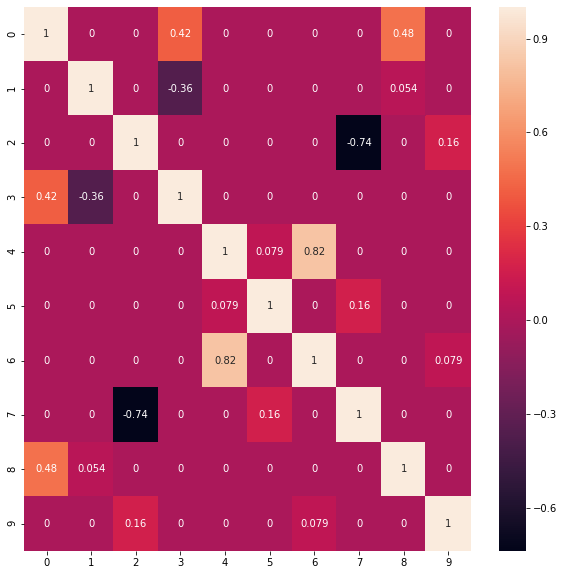

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(prec, annot = True)

In [4]:
covariance = linalg.pinv(prec)

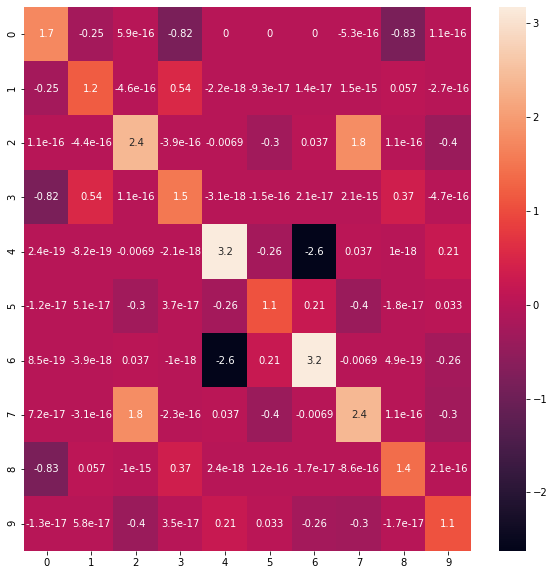

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(covariance, annot = True)

In [6]:
corr = cov2corr(covariance)

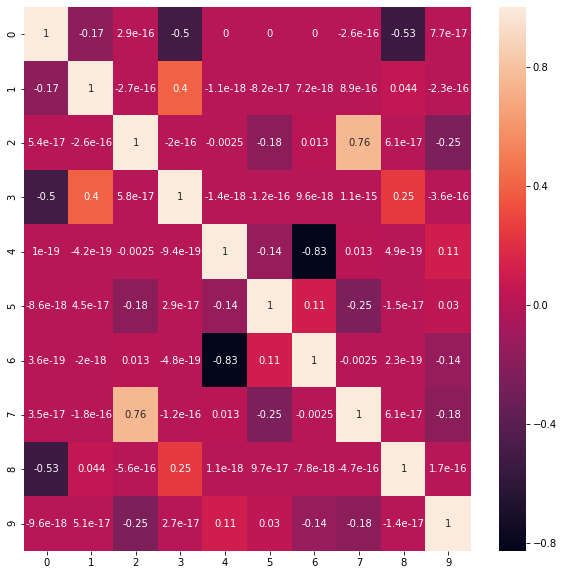

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True)


In [8]:
n_samples = 1000
data = np.zeros((n_samples,n_dim_obs))

for i in range(n_samples):
    data[i, :] = np.random.multivariate_normal(mean,
                                               covariance, 1)

NameError: name 'n_dim_obs' is not defined

In [6]:
np.mean(data,axis=0)

array([ 1.16214382,  0.3792225 , -0.1110888 ,  0.79343646])

In [56]:
mean

array([-0.54809344,  0.13009669,  2.23261532,  0.8577242 ])

In [57]:
cov_emp = (data - mean).T.dot(data - mean) /n_samples
print(linalg.pinv(cov_emp))

[[ 1.13849348 -0.01932401 -0.02024666  0.55033067]
 [-0.01932401  2.05094987  0.00995639 -0.01691855]
 [-0.02024666  0.00995639  0.89887991 -0.00448431]
 [ 0.55033067 -0.01691855 -0.00448431  0.93491592]]


In [63]:
from regain.covariance.graphical_lasso_ import GraphicalLasso, graphical_lasso
prec_graphical_lasso = graphical_lasso(cov_emp, alpha=0.05)[0]
print(prec_graphical_lasso)

[[ 1.08070848 -0.         -0.          0.48637977]
 [-0.          2.05054161  0.         -0.        ]
 [-0.          0.          0.8984378   0.        ]
 [ 0.48637977 -0.          0.          0.88775962]]


In [64]:
print(precision)

[[1.14503817 0.         0.         0.61068702]
 [0.         2.         0.         0.        ]
 [0.         0.         0.90909091 0.        ]
 [0.61068702 0.         0.         0.99236641]]


In [65]:
covariance_lasso = linalg.pinv(prec_graphical_lasso)
print(covariance_lasso)

[[ 1.22814817  0.          0.         -0.67286955]
 [ 0.          0.48767604  0.          0.        ]
 [ 0.          0.          1.1130431   0.        ]
 [-0.67286955  0.          0.          1.49507829]]


In [66]:
print(covariance)

[[1.3, 0, 0, -0.8], [0, 0.5, 0, 0], [0, 0, 1.1, 0], [-0.8, 0, 0, 1.5]]


In [67]:
print(cov_emp)

[[ 1.22825997  0.00549374  0.02399903 -0.72279073]
 [ 0.00549374  0.48770213 -0.00525049  0.00556659]
 [ 0.02399903 -0.00525049  1.11305006 -0.00888312]
 [-0.72279073  0.00556659 -0.00888312  1.49513792]]
